In [4]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [202]:
# color_path = './test_imgs/camo.jpg'
# img_path = './test_imgs/shoe.jpg'
# mask_path = './test_imgs/shoe_mask.bmp'
color_path = './test_imgs/abstract.jpg'
img_path = './test_imgs/shoe.jpg'
mask_path = './test_imgs/shoe_mask.bmp'

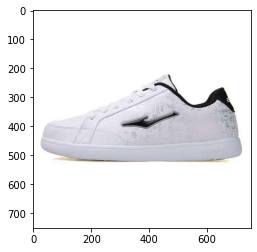

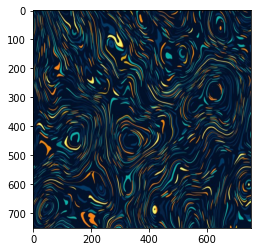

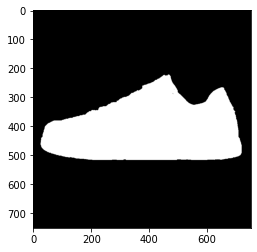

In [203]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
color = cv2.imread(color_path)
color = cv2.resize(color, (img.shape[1], img.shape[0]))
plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
plt.show()
mask = cv2.imread(mask_path)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

In [204]:
# prepare values for color multiplication
mask = np.where(mask == 255, 1, 0)
mask_complement = np.where(mask == 0, 1, 0)

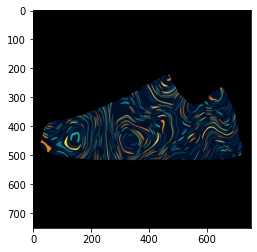

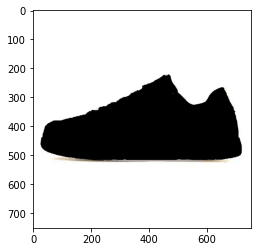

In [205]:
mask_colored = mask * color
plt.imshow(cv2.cvtColor(np.float32(mask_colored/255), cv2.COLOR_BGR2RGB))
plt.show()
# to preserve the background
mask_complement_colored = mask_complement * img
plt.imshow(cv2.cvtColor(np.float32(mask_complement_colored/255), cv2.COLOR_BGR2RGB))
plt.show()

In [206]:
# bah
img = img.astype('uint8')
mask_colored = mask_colored.astype('uint8')
mask = mask.astype('uint8')
img_colored = img.copy()

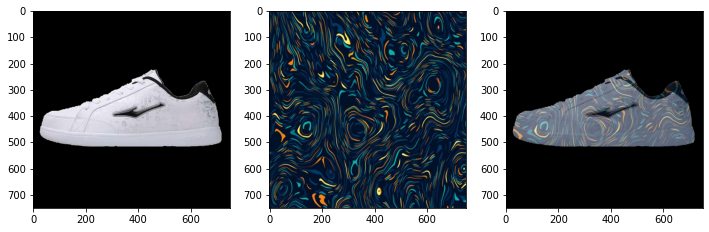

In [207]:
# weighted sum
img_colored = cv2.addWeighted(img, 0.5, mask_colored, 0.5, 0, -1)

fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(img * mask, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(img_colored * mask, cv2.COLOR_BGR2RGB))

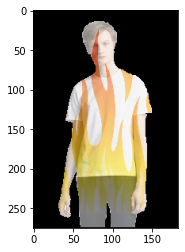

In [201]:
plt.imshow(cv2.cvtColor(img_colored*mask, cv2.COLOR_BGR2RGB))